# Welcome!

We are going to dive into powerful universe of machine learning models. We will start with the easiest one. The idea of learning and intuition will be the same in almost all models, so make sure that you understand upcoming concept first.

## Linear model

# $$\hat{y} = w_0 + w_1x_1+ w_2x_2+ w_3x_3+ ... + w_nx_n$$ 

# $$\hat{y} = w_0 + w_1x_1$$ 

### Imports

numpy: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import ipywidgets as widgets
import andrzej

%matplotlib inline

### My favorite numbers

In [2]:
x = andrzej.x
y = andrzej.y
# y = andrzej.y_hard

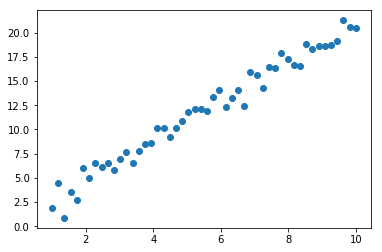

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
def plot_linear_model(a, b):
    y_pred = a * x + b
    plt.scatter(x, y)
    plt.plot(x, y_pred, 'r')
    plt.xlim([x.min() - 5, x.max() + 5])
    plt.ylim([y.min() - 5, y.max() + 5])
    plt.show()

In [5]:
interact(plot_linear_model, a=(-5.0, 5.0), b=(-5.0,5.0))

interactive(children=(FloatSlider(value=0.0, description='a', max=5.0, min=-5.0), FloatSlider(value=0.0, description='b', max=5.0, min=-5.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_linear_model>

# Cost function

# $$L = \frac{1}{N}\sum_{i=0}^N(\hat{y_i} - y_i)^2$$

## $$\epsilon_i = \hat{y_i} - y_i$$

The meaning of cost function is estimating how good our $w_i$ are. The "better" the $w_i$ the lower the loss/cost.
In regression the most used cost is _least squares_. https://en.wikipedia.org/wiki/Least_squares

The $\epsilon_i$ represents the error of our prediction with respect to ground truth value. This is also called _residual_.

In [ ]:
def cost(x, y, w_0, w_1):
    y_pred = w_0 + w_1 * x
    error = y - y_pred
    squared_error = error ** 2
    return squared_error.mean()


In [ ]:
interact(cost, w_0=(-5.0, 5.0), w_1=(-5.0, 5.0), x=fixed(x), y=fixed(y))

# Optimization

The main problem of today's workshop is optimization. There exist many approaches that try to solve it. Optimization is the process of finding the best _paramters_ with respect to some _value_. It is mainly finding _parameters_ that minimize/maximize the _value_.

We fill focus on finding the $w_i$ that minimize $L$ (we will use only $w_0$ and $w_1$).

One approach could be: choose let's say 10 000 different values of $w_0$ and $w_1$ and pick the values that minimize $L$.

More clever approach is solving the equation _analytically_. It will give you the _exact solution_. In linear regression it is possible.

### Gradient descent

However there exist another family of algorithm that optimize a function and do it _numerically_. The main algorithm is _gradient descent_. The main idea of _GD_ is changing the $w_i$ by really small value in a direction that minimizes $L$.

It's an iterative algorithm. It means that you repeat the step explained before until you are satisfied with your results.

Very good source explaining gradient descent: http://lmgtfy.com/?q=gradient+descent

There are many videos/posts explaining that algorithm. Here is script from _CS229: Machine Learning_ course at Stanford University (taught previously by Andrew Ng). http://cs229.stanford.edu/notes/cs229-notes1.pdf

Whole course: http://cs229.stanford.edu/syllabus.html

$$ \epsilon = \frac{1}{N}\sum_{i}^N \epsilon_i $$
$$ k = \frac{1}{N}\sum_{i}^N \epsilon_i x_i $$
$$ w_0 = w_0 - 2 \alpha \epsilon $$
$$ w_1 = w_1 - 2 \alpha k $$


Remember that you need to update $w_0$ and $w_1$ simultaneously. You shouldn't update $w_0$ and then use it too calculate $k$. You should compute $\epsilon$ and $k$ before and store it.

In [ ]:
def gradient_step(x, y, w_0, w_1, alpha=0.01):
    # TO BE IMPLEMENTED
    

In [ ]:
gradient_step = andrzej.gradient_step

In [ ]:
gradient_step(x, y, 0, 0)

In [ ]:
def gradient_descent(x, y, w_0=0.0, w_1=0.0, alpha=0.01, steps=1000, history=True, verbose=True):
    w_history = [(w_0, w_1)]
    cost_history = []
    for i in range(steps):
        current_cost =  cost(x, y, w_0, w_1)
        if verbose and i%100 == 0:
            print("Current cost: ", current_cost)
        cost_history.append(current_cost)
        
        w_0, w_1 = gradient_step( x, y, w_0, w_1,alpha)
        w_history.append((w_0, w_1))
    if not history:
        return w_0, w_1
    else:
        return w_0, w_1, w_history, cost_history

In [ ]:
w_0, w_1, w_history, cost_history = gradient_descent(x, y, alpha=0.001, steps=30, history=True, verbose=False)
print("w_0: {}".format(w_0))
print("w_1: {}".format(w_1))

In [ ]:
plt.plot(np.arange(len(cost_history)), cost_history)
plt.show()

In [ ]:
def plot_gradient_descent(idx, history):
    w_0, w_1 = history[idx]
    y_pred = w_1 * x + w_0
    plt.scatter(x, y)
    plt.plot(x, y_pred, 'r')
    plt.xlim([x.min() - 5, x.max() + 5])
    plt.ylim([y.min() - 5, y.max() + 5])
    plt.show()
    print("w_0: {}".format(w_0))
    print("w_1: {}".format(w_1))

In [ ]:
interact(plot_gradient_descent, idx=(0, len(w_history)-1), history=fixed(w_history))

# Sklearn

Now you can compare your solutions to one's provided by most used library in machine learning, which is _scikit-learn_. In day to day work you normally don't implement algorithms like _linear regression_, but you should now how it is implemented to use it properly.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x.reshape(-1, 1), y) # X in sklearn must be two-dimensional

In [ ]:
print("your w_0: {}".format(w_0))
print("your w_1: {}".format(w_1))

print("sklearn w_0: {}".format(model.intercept_))
print("sklearn w_1: {}".format(model.coef_[0]))